# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the network of the Comics Characters on Wikipedia. 
This is the outline for today:

* Visualization and qualitative analysis of the Comic Book Characters Network
* Properties of the network structure, including how univere-origin and other properties shape the network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into [Section 9.4](http://networksciencebook.com/chapter/9#modularity) in the exercises below. We will also talk a little bit about degree correlations - you can read about those in [Chapter 7](http://networksciencebook.com/chapter/7)\.

## The informal intro

Today I talk about 
* The exercises for today. 
* How great Slack has been this year and secrets to using it.

Plain and simple. No additional practical information.

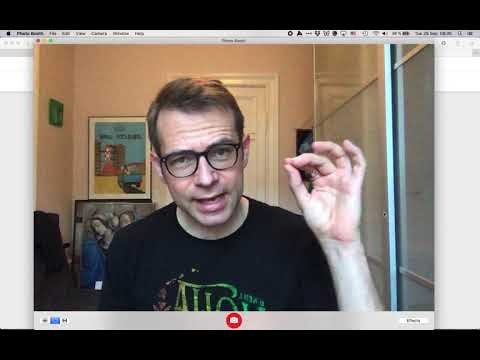

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("no0d85VS18w",width=800, height=450)

---
# Part A: Let's  visualise!

*Exercise 1*: Build the right graph for visualization. 

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2020/blob/master/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4:

>1. Use NetworkX `DiGraph` to store the network of characters. Remember that characters are linked if they have a corresponding link between their Wikipedia contents. 
>   * **Additionally**, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have more than 2k nodes and more than 15k edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component
>2. As you build the graph, store the attributes of the nodes (remember the `universe` from the past week). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each character's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

In [87]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import pickle
import import_ipynb
from exercise4 import *

In [4]:
## extract the largest component
largest_cc = max(nx.weakly_connected_components(G), key=len)
S = G.subgraph(largest_cc.copy())

In [5]:
### it's done in exercise 4.

*Exercise 2:* Let's build a simple visualization of network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the network resulting undirected. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `universe` attribute (i.e. use different colors for DC and Marvel universe)
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `universe` attribute. If an edge connects two nodes from Marvel universe assign `color_a`, if the edge connects two nodes from DC universe assign `color_b`, in case a link connects nodes from disparate universes, cases assign `color_c`. (Here, you get to decide on the colors.)

In [6]:
## undirected network
H = S.to_undirected()

In [7]:
universe_attribute = nx.get_node_attributes(H,'universe')
color_map = []
for node in H:
    if universe_attribute[node] == 'Marvel':
        color_map.append('#ff0000')
    else:
        color_map.append("#000000")  
        
node_degree = dict(H.degree())
node_size = [v * 0.5 for v in node_degree.values()]

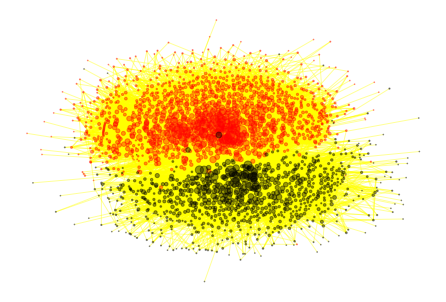

In [8]:
nx.draw_kamada_kawai(H, node_color=color_map,node_size=node_size, edge_color = 'yellow',alpha = 0.4)

*Exercise 3:* We can make even better visualisations with `ForceAtlas2` package
>1. The [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps calculate more aesthetically pleasing positions for the nodes (see what the result looks like below).
>2.You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `universe` attribute (i.e. use different colors for DC and Marvel universe)
>   * Node size should depend on the node *degree*
>   * **Optional**: Edge colour should depend on the `universe` attribute. If an edge connects nodes from Marvel universe assign `color_a`, if the edge connects nodes from DC universe assign `color_b`, in other cases assign `color_c`
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you see that the nodes seperate into two separate clusters? Can you see high-degree nodes? In the plot below, the red nodes seem to split into two sub-clusters: What's going on there?

![Network](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/week5_fa2_a.png?raw=true)

100%|██████████| 2000/2000 [01:47<00:00, 18.57it/s]


BarnesHut Approximation  took  19.03  seconds
Repulsion forces  took  83.52  seconds
Gravitational forces  took  0.30  seconds
Attraction forces  took  2.01  seconds
AdjustSpeedAndApplyForces step  took  1.09  seconds


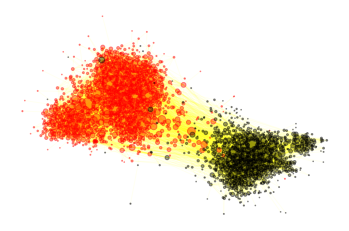

In [31]:
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt


forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.5,

                        # Performance
                        jitterTolerance=0.2,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=5.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(H, pos=None, iterations=2000)


nx.draw_networkx_nodes(H, positions, node_size=node_size, node_color=color_map,alpha = 0.4)
nx.draw_networkx_edges(H, positions, edge_color="yellow", alpha=0.05)
plt.axis('off')
plt.show()

*Exercise 4*: We continue with a qualitative inspection of the Wikipedia pages, that will help us to intepret our results. We investigate the reasons for links between characters to exist on Wikipedia.

>1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>   * Consider the set of neighbours pointing towards the node found above. 
>   * What is the relation between the characters you identified and his/her network neighbours? (e.g. do they appear in the same comics, are they opponents...). You don't need to come up with a grand theory of comics here, I just want you to think about how links com about.
>   * Repeat the exercise for the largest out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia
>5. Are there any nodes with high out-degree and with few incoming connections? If yes, open WikiPages of such characters and explain what happens?
>6. Are there any nodes with high in-degree and few outcoming connections? Again, open WikiPages of such characters and explain what happens? 

In [10]:
in_degree_dict = dict(G.in_degree())
max_key = max(in_degree_dict, key=in_degree_dict. get)
print(max_key)
neighbor_universe = []
for neighbor in G.neighbors(max_key):
    neighbor_universe.append(G.nodes[neighbor]["universe"])
    
print(np.unique(neighbor_universe))

Spider-Man
['DC' 'Marvel']


In [11]:
out_degree_dict = dict(G.out_degree())
max_key = max(out_degree_dict, key=out_degree_dict. get)
print(max_key)
neighbor_universe = []
for neighbor in G.neighbors(max_key):
    neighbor_universe.append(G.nodes[neighbor]["universe"])
    
print(np.unique(neighbor_universe))

Hood
['Marvel']


In [12]:
out_degree_lst = sorted(dict(out_degree_dict).items(), key=operator.itemgetter(1),reverse = True)[:100]
hero_lst = []
for i in range(100):
    hero = out_degree_lst[i][0]
    if G.in_degree(hero) <= 1:
        hero_lst.append(hero)
        
print(G.out_degree(hero_lst))
print(G.in_degree(hero_lst))

[('Barracuda (II)', 73), ('Phone Ranger', 63), ('Cloak', 61), ('Dagger', 61), ('Lady Grey', 60), ('Grindhouse', 56), ('Karin Grace', 52), ('Milton Fine', 51), ('Warbird', 48), ('A-Bomb', 44), ('Boom-Boom', 44)]
[('Barracuda (II)', 0), ('Phone Ranger', 0), ('Cloak', 1), ('Dagger', 0), ('Lady Grey', 1), ('Grindhouse', 1), ('Karin Grace', 0), ('Milton Fine', 0), ('Warbird', 0), ('A-Bomb', 0), ('Boom-Boom', 0)]


In [13]:
in_degree_lst = sorted(dict(in_degree_dict).items(), key=operator.itemgetter(1),reverse = True)[:200]
hero_lst = []
for i in range(200):
    hero = in_degree_lst[i][0]
    if G.out_degree(hero) <= 10:
        hero_lst.append(hero)
        
print(G.in_degree(hero_lst))
print(G.out_degree(hero_lst))

[('Black Panther', 124), ('Black Widow', 103), ('Vision', 92), ('Green Goblin', 91), ('Siege', 69), ('Batwoman', 51), ('Diamondback', 43), ('Flashback', 43), ('Hasbro', 43)]
[('Black Panther', 6), ('Black Widow', 4), ('Vision', 6), ('Green Goblin', 9), ('Siege', 5), ('Batwoman', 4), ('Diamondback', 9), ('Flashback', 4), ('Hasbro', 3)]


# Part B:  Advanced tools 

> **Video lecture**: *Network measures*. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://www.youtube.com/watch?v=0uAYpOqVHCU).

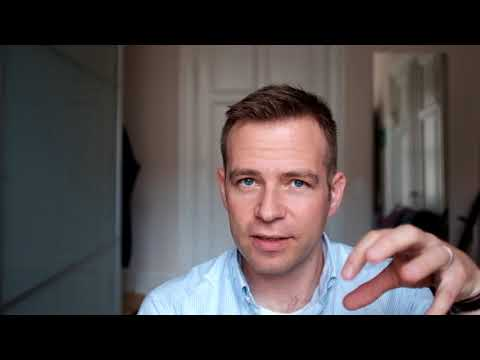

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=800, height=450)

*Exercise 1:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

>1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>    * On top of that, calculate same statistics separately for the network that is spanned only by DC Characters (we call this the DC-network), and only by the Marvel characters (the Marvel-network). How do you interpret the results? 
>2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install `powerlaw` package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Some long time ago, couple of scientist have analyzed the network that is spanned by the whole Wikipedia (paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A**? If not, why? 
>3. Plot a scatter plot of the the in- versus out- degree for all characters. Comment on the relation between the two.
>4. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. What is the advantage of using a heatmap over the scatter plot?
>5. Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
>6. We have one more metric that we did not use. The node-attribute `content lenght`. There are two things we can investigate here.
>   * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree.
>   * Secondly, and more interestingly, it could be that longer texts means more famous characters. And that means more in-links. 
>   * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words

### question 1

In [15]:
from scipy import stats
def calculate_stastics(values):
    mean = np.mean(values)
    median = np.median(values)
    mode = int(stats.mode(values)[0])
    maximum = np.max(values)
    minimum = np.min(values)
    print('The mean is {:.2f}'.format(mean))
    print('The median is {:.2f}'.format(median))
    print('The mode is {:.2f}'.format(mode))
    print('The maximum is {:.2f}'.format(maximum))
    print('The minimum is {:.2f}'.format(minimum))

print('-------the stastics of in degree-------')
print('')
calculate_stastics(list(in_degree_dict.values()))

-------the stastics of in degree-------

The mean is 14.90
The median is 6.00
The mode is 0.00
The maximum is 459.00
The minimum is 0.00


In [16]:
print('-------the stastics of out degree-------')
print('')
calculate_stastics(list(out_degree_dict.values()))

-------the stastics of out degree-------

The mean is 14.90
The median is 10.00
The mode is 6.00
The maximum is 129.00
The minimum is 0.00


In [17]:
def get_universe_degree(degree_function):
    
    
    degree = list(dict(degree_function).values())
    heros = list(dict(degree_function).keys())

    dc_degree = [ ]
    marvel_degree = []
    for i,hero in enumerate(heros):
        if G.nodes[hero]['universe'] == 'DC':
            dc_degree.append(degree[i])
        else:
            marvel_degree.append(degree[i])
    
    return dc_degree,marvel_degree

In [18]:
dc_out_degree,marvel_out_degree = get_universe_degree(G.out_degree())
print('-------the stastics of out degree(DC)-------')
print('')
calculate_stastics(dc_out_degree)

print('')
print('-------the stastics of out degree(Marvel)-------')
print('')
calculate_stastics(marvel_out_degree)

-------the stastics of out degree(DC)-------

The mean is 11.78
The median is 8.50
The mode is 0.00
The maximum is 73.00
The minimum is 0.00

-------the stastics of out degree(Marvel)-------

The mean is 17.06
The median is 12.00
The mode is 6.00
The maximum is 129.00
The minimum is 0.00


In [19]:
dc_out_degree,marvel_out_degree = get_universe_degree(G.in_degree())
print('-------the stastics of in degree(DC)-------')
print('')
calculate_stastics(dc_out_degree)

print('')
print('-------the stastics of in degree(Marvel)-------')
print('')
calculate_stastics(marvel_out_degree)

-------the stastics of in degree(DC)-------

The mean is 10.93
The median is 4.00
The mode is 0.00
The maximum is 385.00
The minimum is 0.00

-------the stastics of in degree(Marvel)-------

The mean is 17.66
The median is 7.00
The mode is 0.00
The maximum is 459.00
The minimum is 0.00


### question 2

In [20]:
import powerlaw
in_degree = list(dict(G.in_degree()).values())
powerlaw.Fit(in_degree).alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.4184063305864445

In [21]:
out_degree = list(dict(G.out_degree()).values())
powerlaw.Fit(out_degree).alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


5.4429848668140455

In [22]:
total_degree = list(dict(G.degree()).values())
powerlaw.Fit(total_degree).alpha

Calculating best minimal value for power law fit


2.8197264824503314

### question3

(0.9, 1122.018454301963)

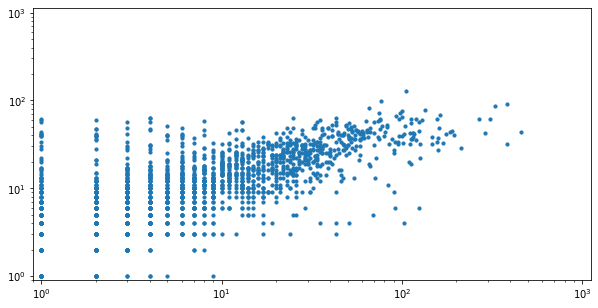

In [23]:
# plt.scatter(in_degree,out_degree)

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.scatter(in_degree,out_degree,s = 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.9)
ax.set_xlim(xmin = 0.9)

### question4 

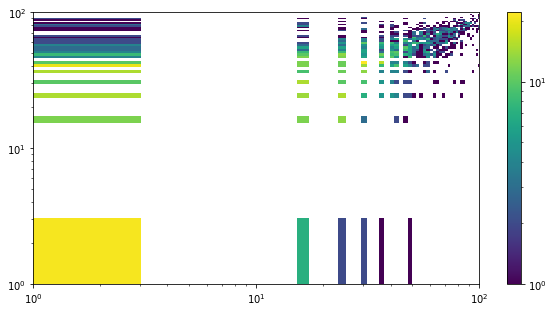

In [24]:
import matplotlib

plt.figure(figsize=(10,5))
heatmap, xedges, yedges = np.histogram2d(in_degree, out_degree, bins=np.logspace(0,2,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',norm = matplotlib.colors.LogNorm(),aspect = 'auto')
plt.colorbar()
plt.loglog()
plt.show()

### question 5

In [29]:
content_length_lst = list(nx.get_node_attributes(G,'length_of_content').values())
np.corrcoef(content_length_lst,out_degree)

array([[1.       , 0.7574413],
       [0.7574413, 1.       ]])

(0.9, 1122.018454301963)

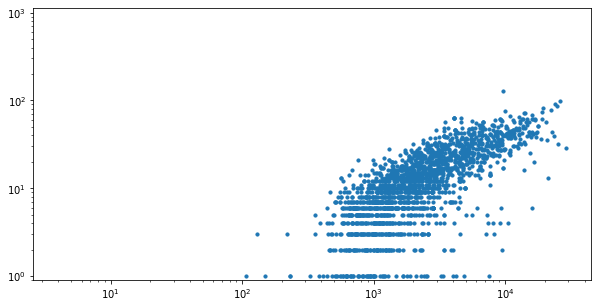

In [35]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.scatter(content_length_lst,out_degree,s = 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.9)

[[1.         0.64038351]
 [0.64038351 1.        ]]


(0.9, 1122.018454301963)

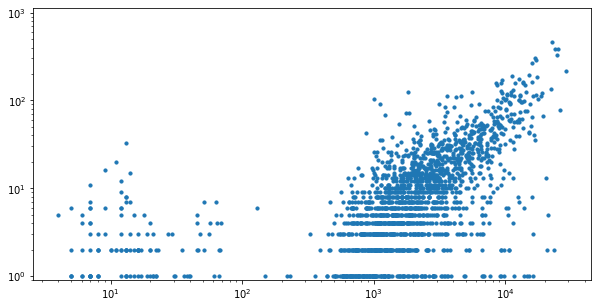

In [36]:
print(np.corrcoef(content_length_lst,in_degree))

fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.scatter(content_length_lst,in_degree,s = 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.9)

*Exercise 2:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). 

Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise. Meanwhile, **for this exercise use either the DC or Marvel Network alone (i.e. only a single universe). This it will help you to see the differences).**
>1. Find the 5 most central characters according to degree centrality. 
>   * Repeat Exercise A2 or A3 from above for your new sub-network (depending on which visualization method you liked the most), but with our new network.
>1. Find the 5 most central characters according to betweenness centrality. 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use betweenness centrality to define the size of the node.
>   * What role do you imagine characters with high wikipedia graph betweenness centrality play? 
>2. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>   * What role do you imagine characters with high wikipedia graph eigenvector centrality play? 
>3. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? 
>    * Repeat using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
>4. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
>4. Is the undirected version of the graph assortative with respect do the `content length` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?. Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
>5. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>   * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

---

> * **Optional** (but cool). What about betweenness centrality in the full network? Create a visualization of the network using Force Atlas 2, where you set the size of nodes to scale according to their betweenness centrality. Describe in your own words what you learn from that plot.

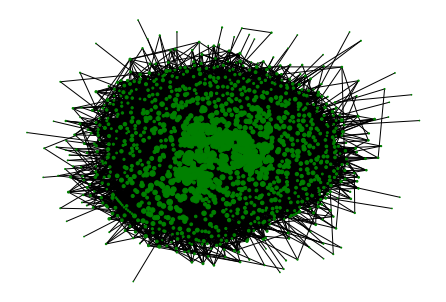

In [143]:
# degree_centarlity_Marvel = [for hero,centrality in nx.degree_centrality(G).items()]
marvel_nodes =[hero for hero in  G.nodes if hero in marvel_heros]
G_marvel = G.subgraph(marvel_nodes)
G_marvel = G_marvel.to_undirected()
degree_centarlity = list(nx.degree_centrality(G_marvel).values())
node_degree = dict(G_marvel.degree())
node_size = [v * 0.5 for v in node_degree.values()]
nx.draw_kamada_kawai(G_marvel, node_color= 'green',node_size=node_size, edge_color = 'black')

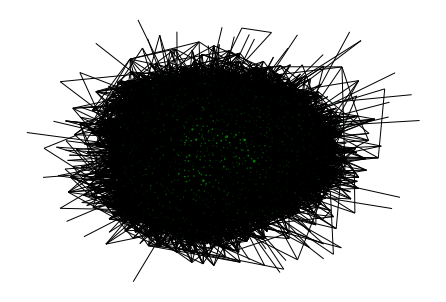

In [144]:
betweenness_centrality = list(nx.betweenness_centrality(G_marvel).values())
node_size = [v * 30 for v in betweenness_centrality]
nx.draw_kamada_kawai(G_marvel, node_color= 'green',node_size=node_size, edge_color = 'black')

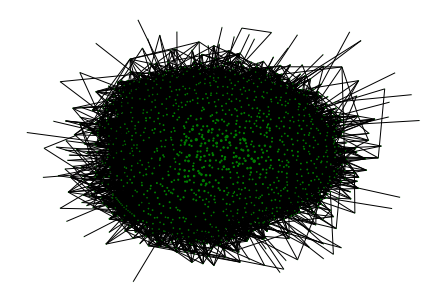

In [145]:
eigenvector_centrality = list(nx.eigenvector_centrality(G_marvel).values())
node_size = [v * 30 for v in eigenvector_centrality]
nx.draw_kamada_kawai(G_marvel, node_color= 'green',node_size=node_size, edge_color = 'black')

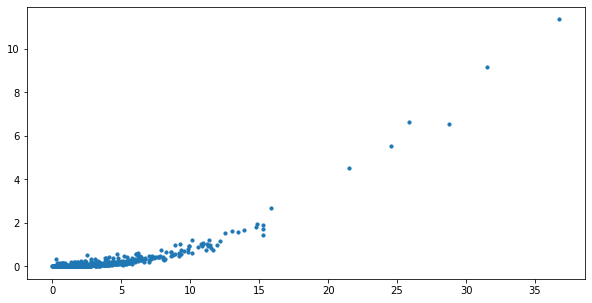

In [146]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
x  = [value*100 for value in degree_centarlity]
y = [value*100 for value in betweenness_centrality]
ax.scatter(x,y,s = 10)

(0.9, 21.915923881464227)

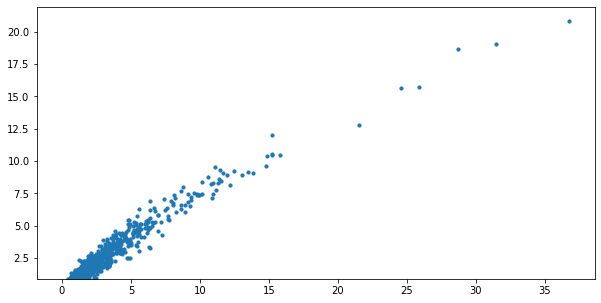

In [151]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
y = [value*100 for value in eigenvector_centrality]
ax.scatter(x,y,s = 10)
ax.set_ylim(ymin = 0.9)

In [152]:
nx.attribute_assortativity_coefficient(G_marvel, 'length_of_content', nodes=None)

0.005866312387773303

In [88]:
marvel_nodes =[hero for hero in  G.nodes if hero in marvel_heros]
G_marvel = G.subgraph(marvel_nodes)
G_marvel = G_marvel.to_undirected()
print(len(G_marvel))

1233


In [89]:
average_shortest_length = []
nodes_num = len(G_marvel)
for m in nx.shortest_path_length(G_marvel):
    shortest_length =list(m[1].values())[1:]
    average_shortest_length.append(shortest_length)

(array([ 34470.,      0., 737144.,      0.,      0., 684702.,      0.,
         54392.,      0.,    962.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

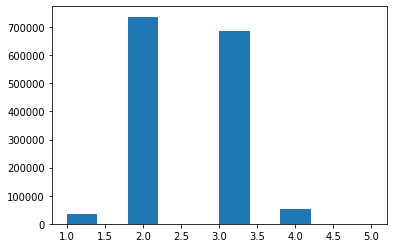

In [90]:
newlist = sum(average_shortest_length, [])
plt.hist(newlist)

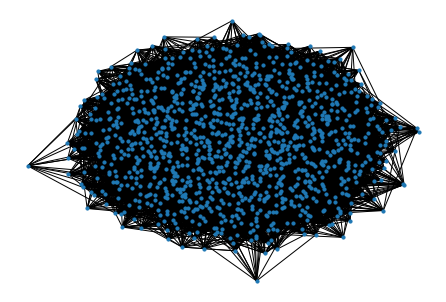

In [91]:
k = sum(dict(G_marvel.degree()).values())/len(G_marvel)
N = len(G_marvel)
p = k/(N-1)
H = nx.erdos_renyi_graph(N,p)
nx.draw(H,node_size = 10)

(array([3.47700e+04, 0.00000e+00, 0.00000e+00, 7.05444e+05, 0.00000e+00,
        0.00000e+00, 7.78826e+05, 0.00000e+00, 0.00000e+00, 1.60000e+01]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

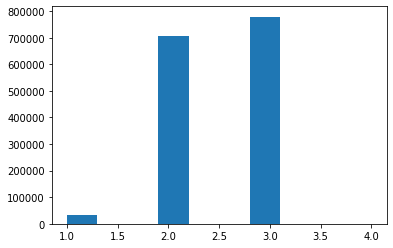

In [92]:
average_shortest_length = []
for m in nx.shortest_path_length(H):
    shortest_length =list(m[1].values())[1:]
    average_shortest_length.append(shortest_length)
    
newlist = sum(average_shortest_length, [])
plt.hist(newlist)

*Exercise 3*: Does a universe of a character play a large role? Now, let us explore if and how they shape the network (use full network). 
>1. Compute the average node centrality for Marvel and DC characters respectively (choose your favourite centrality measure). Which universe has the more central characters?
>2. Create a randomized version of the full graph, where the association between nodes and universes is shuffled. Compute the average centrality of DC and Marvel nodes for this randomized graph. 
>   * **Hint**: To create this shuffling, simply give everyone a random universe assignment (but with the same number of Marvel and DC characters as in the real data). The way I usually create random lables is by using either [`random.shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) or [`numpy.random.permutation`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html).
>3. Repeat the shuffling process above 1000 times (at least) and plot two histograms, each histogram with the 1000 corresponding average values of centrality obtained for Marvel and DC characters in the shuffeled netowrks.
>4. Compare the value you have obtained in the real graph, with the randomized cases. Are characters of one of the two universes more central in the network (on average)?
>5. Think about your results, what could be possible explanations for what you observe?

In [68]:
def calculate_universe_degree_centarlity(G,universe_heros):
    
    degree_centarlity = nx.degree_centrality(G)
    degree_centarlity_universe  = [centrality for hero,centrality in nx.degree_centrality(G).items() if hero in universe_heros]

    return np.mean(degree_centarlity_universe)



degree_centarlity_Marvel  = calculate_universe_degree_centarlity(G,marvel_heros)
degree_centarlity_DC = calculate_universe_degree_centarlity(G,dc_heros)
print(degree_centarlity_Marvel,degree_centarlity_DC)

0.01661136916611369 0.010867043642163258


In [71]:
import random
# node_mapping = random.shuffle(list(G.nodes()))

node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: random.random())))
G_new = nx.relabel_nodes(G, node_mapping)

degree_centarlity_Marvel  = calculate_universe_degree_centarlity(G_new,marvel_heros)
degree_centarlity_DC = calculate_universe_degree_centarlity(G_new,dc_heros)
print(degree_centarlity_Marvel,degree_centarlity_DC)

0.01374327213743272 0.014988679581981018


In [77]:
marvel_centarlity = []
dc_centarlity = []
for i in range(1000):
    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: random.random())))
    G_new = nx.relabel_nodes(G, node_mapping)
    degree_centarlity = nx.degree_centrality(G_new)
    
    degree_centarlity_Marvel  = calculate_universe_degree_centarlity(G_new,marvel_heros)
    degree_centarlity_DC = calculate_universe_degree_centarlity(G_new,dc_heros)
    
    marvel_centarlity.append(degree_centarlity_Marvel)
    dc_centarlity.append(degree_centarlity_DC)

(array([  4.,  13.,  44., 140., 223., 246., 189.,  95.,  40.,   6.]),
 array([0.01306263, 0.01328813, 0.01351362, 0.01373912, 0.01396462,
        0.01419011, 0.01441561, 0.01464111, 0.01486661, 0.0150921 ,
        0.0153176 ]),
 <a list of 10 Patch objects>)

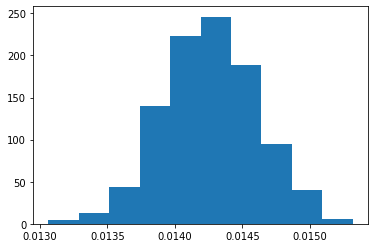

In [78]:
plt.hist(marvel_centarlity)

(array([  6.,  40.,  95., 189., 246., 223., 140.,  44.,  13.,   4.]),
 array([0.01272627, 0.01305032, 0.01337438, 0.01369843, 0.01402248,
        0.01434654, 0.01467059, 0.01499465, 0.0153187 , 0.01564275,
        0.01596681]),
 <a list of 10 Patch objects>)

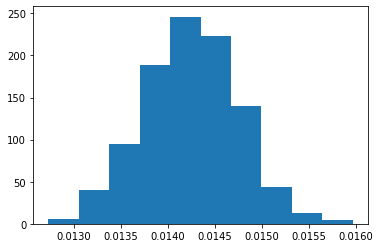

In [79]:
plt.hist(dc_centarlity)